# SRGAN

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
from data import DIV2K
from model.srgan import SRGAN, Discriminator
from train import SrganTrainer, SrganGeneratorTrainer

%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)
seed_value = 1234
tf.random.set_seed(seed_value)

In [3]:
# Location of model weights (needed for demo)
weights_dir = 'weights/srgan'
weights_file = lambda filename: os.path.join(weights_dir, filename)

os.makedirs(weights_dir, exist_ok=True)

## Datasets

You don't need to download the DIV2K dataset as the required parts are automatically downloaded by the `DIV2K` class. By default, DIV2K images are stored in folder `.div2k` in the project's root directory.

In [4]:
div2k_train = DIV2K(scale=4, subset='train', downgrade='bicubic')
div2k_valid = DIV2K(scale=4, subset='valid', downgrade='bicubic')

In [5]:
train_ds = div2k_train.dataset(batch_size=16, random_transform=True)
valid_ds = div2k_valid.dataset(batch_size=16, random_transform=True, repeat_count=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


## Training

### Pre-trained models

If you want to skip training and directly run the demo below, download [weights-srgan.tar.gz](https://martin-krasser.de/sisr/weights-srgan.tar.gz) and extract the archive in the project's root directory. This will create a folder `weights/srgan` containing the weights of the pre-trained models.

### Generator pre-training

In [6]:
generator = SRGAN()

In [7]:
pre_trainer = SrganGeneratorTrainer(model=generator, checkpoint_dir=f'.ckpt/pre_generator')
pre_trainer.train(train_ds,
                  valid_ds.take(1000),
                  steps=200000, 
                  evaluate_every=1000, 
                  save_best_only=False)

pre_trainer.model.save_weights(weights_file('pre_generator.h5'))

1000/200000: loss = 706.975, PSNR = 23.397989 (35.25s)
2000/200000: loss = 357.681, PSNR = 24.610395 (24.82s)
3000/200000: loss = 292.034, PSNR = 24.380390 (24.97s)
4000/200000: loss = 264.955, PSNR = 26.057308 (24.74s)
5000/200000: loss = 244.629, PSNR = 24.393734 (24.71s)
6000/200000: loss = 240.625, PSNR = 25.761503 (24.84s)
7000/200000: loss = 224.343, PSNR = 25.387739 (24.69s)
8000/200000: loss = 224.630, PSNR = 26.161854 (24.67s)
9000/200000: loss = 217.687, PSNR = 26.265581 (25.82s)
10000/200000: loss = 210.489, PSNR = 27.059076 (25.69s)
11000/200000: loss = 208.032, PSNR = 26.953852 (25.75s)
12000/200000: loss = 201.119, PSNR = 27.682226 (24.67s)
13000/200000: loss = 203.854, PSNR = 26.888533 (24.93s)
14000/200000: loss = 197.985, PSNR = 27.940674 (24.76s)
15000/200000: loss = 198.709, PSNR = 27.732967 (25.52s)
16000/200000: loss = 194.869, PSNR = 27.935534 (24.84s)
17000/200000: loss = 191.944, PSNR = 28.116880 (24.81s)
18000/200000: loss = 189.488, PSNR = 28.300707 (24.68s)
1

147000/200000: loss = 159.785, PSNR = 29.777861 (24.69s)
148000/200000: loss = 157.872, PSNR = 29.542389 (25.33s)
149000/200000: loss = 160.916, PSNR = 29.188610 (25.82s)
150000/200000: loss = 159.345, PSNR = 28.849989 (25.39s)
151000/200000: loss = 160.749, PSNR = 28.701797 (25.85s)
152000/200000: loss = 156.833, PSNR = 28.590586 (25.39s)
153000/200000: loss = 159.407, PSNR = 29.236856 (25.09s)
154000/200000: loss = 160.054, PSNR = 29.514330 (24.91s)
155000/200000: loss = 160.308, PSNR = 28.605133 (24.97s)
156000/200000: loss = 158.508, PSNR = 29.148228 (24.68s)
157000/200000: loss = 161.628, PSNR = 29.828995 (24.96s)
158000/200000: loss = 160.346, PSNR = 29.897905 (24.83s)
159000/200000: loss = 157.369, PSNR = 29.255449 (24.85s)
160000/200000: loss = 158.296, PSNR = 29.557217 (24.97s)
161000/200000: loss = 160.467, PSNR = 29.452627 (24.82s)
162000/200000: loss = 158.139, PSNR = 29.000347 (24.68s)
163000/200000: loss = 158.831, PSNR = 29.571369 (24.98s)
164000/200000: loss = 156.821, 

### Generator fine-tuning (GAN)

In [ ]:
gan_generator = SRGAN()
discriminator = Discriminator()
gan_generator(tf.ones((1, 24, 24, 3)))
# gan_generator.load_weights(weights_file('pre_generator.h5'))

gan_trainer = SrganTrainer(generator=gan_generator, discriminator=discriminator)
gan_trainer.train(train_ds, steps=200000)

50/200000, perceptual loss = 0.1859, discriminator loss = 0.4600
100/200000, perceptual loss = 0.1876, discriminator loss = 0.2421
150/200000, perceptual loss = 0.1947, discriminator loss = 0.3532
200/200000, perceptual loss = 0.1960, discriminator loss = 0.6719
250/200000, perceptual loss = 0.1748, discriminator loss = 0.1793
300/200000, perceptual loss = 0.1954, discriminator loss = 0.2593
350/200000, perceptual loss = 0.1993, discriminator loss = 0.6223
400/200000, perceptual loss = 0.1853, discriminator loss = 0.3784
450/200000, perceptual loss = 0.1742, discriminator loss = 0.5367
500/200000, perceptual loss = 0.1947, discriminator loss = 0.4825
550/200000, perceptual loss = 0.1825, discriminator loss = 0.3737
600/200000, perceptual loss = 0.2003, discriminator loss = 0.4777
650/200000, perceptual loss = 0.1867, discriminator loss = 0.5536
700/200000, perceptual loss = 0.1854, discriminator loss = 0.2834
750/200000, perceptual loss = 0.1795, discriminator loss = 0.3782
800/200000,

In [17]:
gan_trainer.generator.save_weights(weights_file('gan_generator.h5'))
gan_trainer.discriminator.save_weights(weights_file('gan_discriminator.h5'))

## Demo

In [6]:
gan_generator = SRGAN()
gan_generator(tf.ones((1, 24, 24, 3)))
gan_generator.load_weights(weights_file('gan_generator.h5'))

In [8]:
from model import resolve_single
from utils import load_image

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)

    gan_sr = resolve_single(gan_generator, lr)
    
    plt.figure(figsize=(20, 20))
    
    images = [lr, gan_sr]
    titles = ['Original', 'SRGAN']
    positions = [1, 2]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(1, 2, pos)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

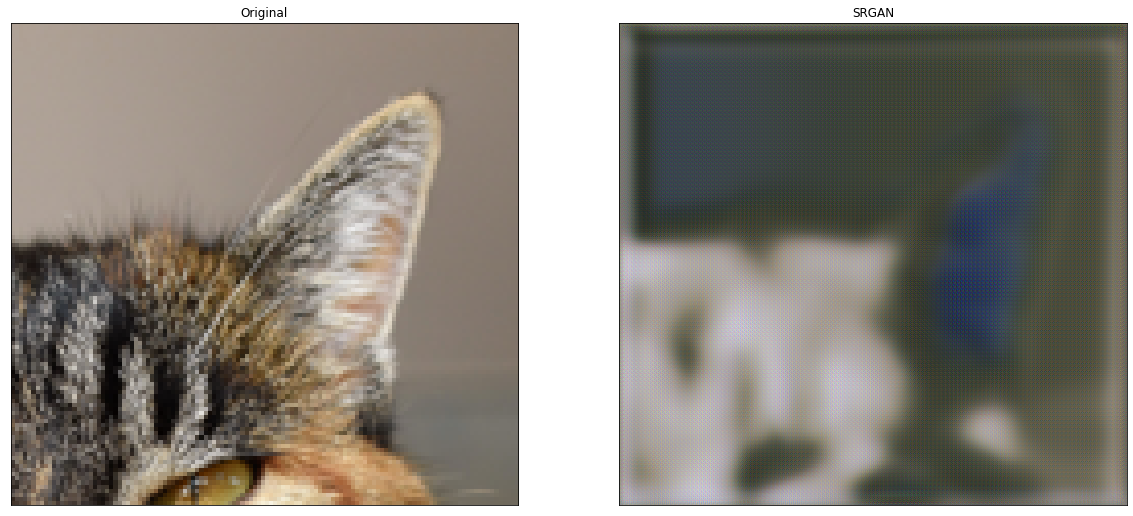

In [9]:
resolve_and_plot('demo/0869x4-crop.png')